## Analyze the shopping trend dataset by answering the questions below.
> **IMPORTANT** write your insights after each question

# Read the data

In [2]:
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "shopping_trends_updated.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "iamsouravbanerjee/customer-shopping-trends-dataset",
  file_path,
  # Provide any additional arguments like
  # sql_query or pandas_kwargs. See the
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

df.head()

/tmp/ipython-input-1162196871.py:10: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  df = kagglehub.load_dataset(


,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


### Question 1
What is the distribution of `Purchase Amount (USD)` for different `Subscription Status` values?
- Plot using both **Seaborn’s `boxplot` and Matplotlib’s histogram**.
- Are there any outliers?

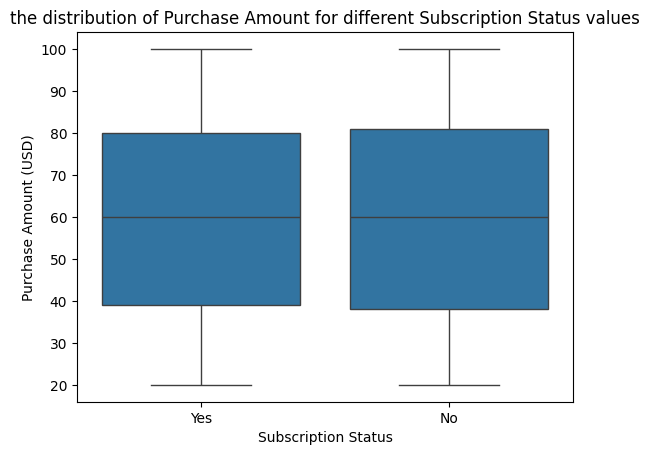

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x="Subscription Status",y="Purchase Amount (USD)" , data=df)
plt.title("the distribution of Purchase Amount for different Subscription Status values")
plt.xlabel("Subscription Status")
plt.ylabel("Purchase Amount (USD)")
plt.show()

there is no big difference in the purchase amount between subscriped and not subscriped people , and no outliers

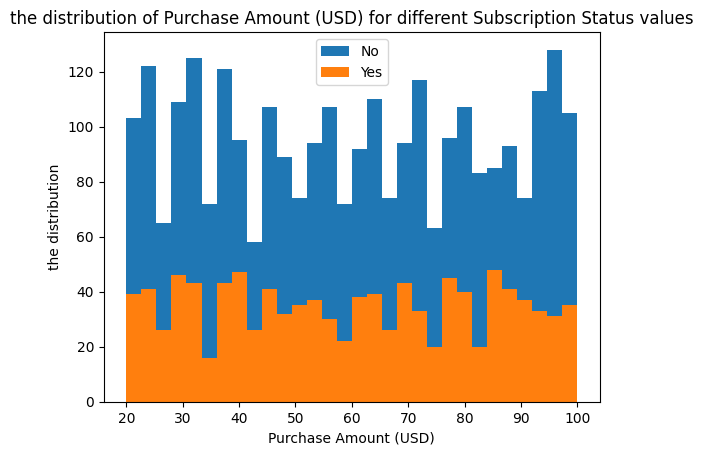

In [4]:
for i,value in df.groupby("Subscription Status"):
  plt.hist(value["Purchase Amount (USD)"],bins=30,label=i)
plt.title("the distribution of Purchase Amount (USD) for different Subscription Status values")
plt.xlabel("Purchase Amount (USD)")
plt.ylabel("the distribution")
plt.legend()
plt.show()

people who are not subscriped has a higher purchase rate than subscriped people

### Question 2
Compare the frequency of each `Payment Method` across the dataset **from highest to lowest** .
- Use both **Seaborn's `countplot`** and **Matplotlib's bar plot**.

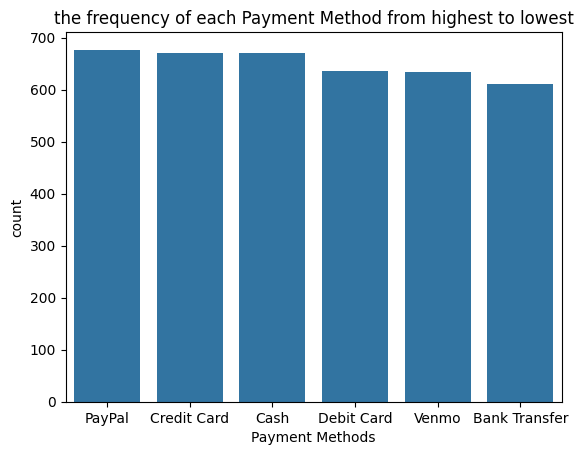

In [5]:
sns.countplot(x="Payment Method",data=df,order=df["Payment Method"].value_counts().index)
plt.title("the frequency of each Payment Method from highest to lowest")
plt.xlabel("Payment Methods")
plt.ylabel("count")
plt.show()

PayPal is the highst used purchasing method and bank transfer is the lowest

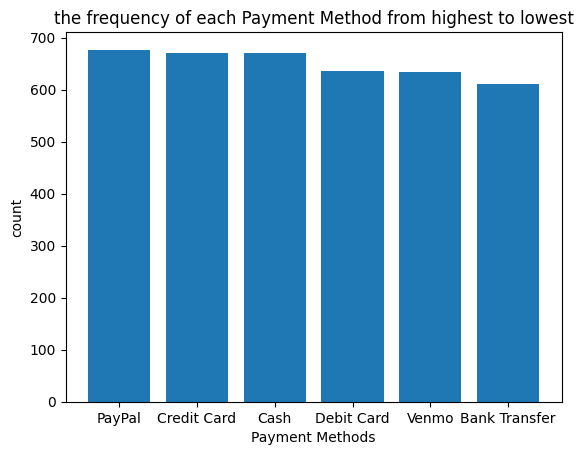

In [6]:
x=df["Payment Method"].value_counts()
plt.bar(x.index,x.values)
plt.title("the frequency of each Payment Method from highest to lowest")
plt.xlabel("Payment Methods")
plt.ylabel("count")
plt.show()

PayPal is the highst used purchasing method and bank transfer is the lowest

### Question 3
Show the number of purchases made by each `Gender` in each `Season`.
- Create a **grouped bar chart/ Pie chart using Matplotlib**.
- Also plot a **stacked countplot using Seaborn**.

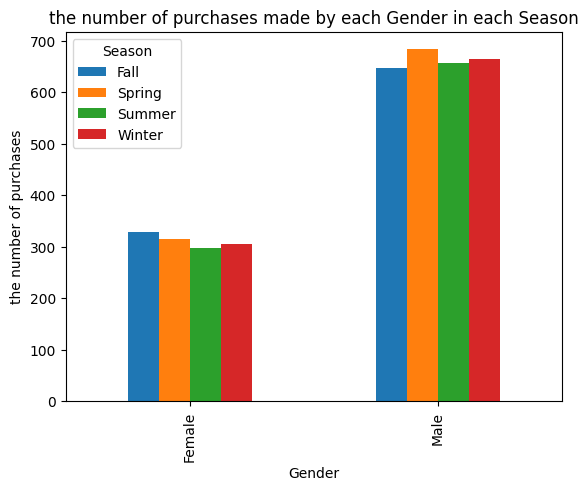

In [7]:
number_of_purchases=df.groupby(["Gender","Season"]).size().unstack()
number_of_purchases.plot(kind="bar")
plt.title("the number of purchases made by each Gender in each Season")
plt.xlabel("Gender")
plt.ylabel("the number of purchases")
plt.show()

the femals purchasing rate is much higher than the males in all seasons

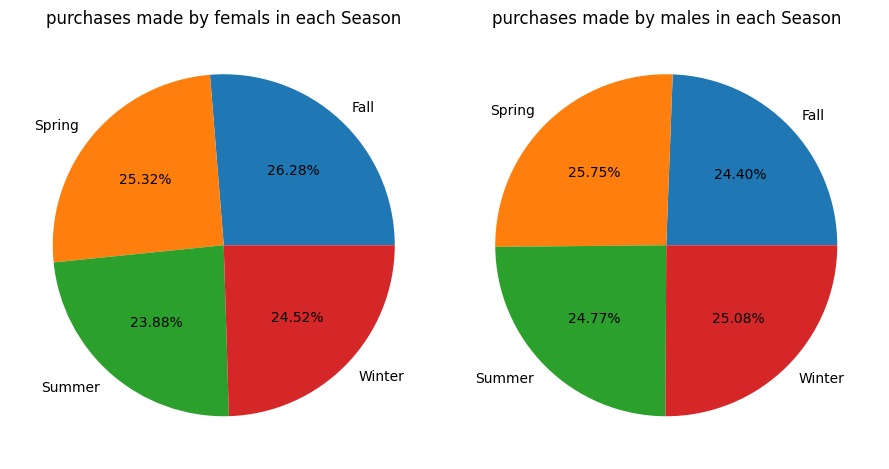

In [8]:
plt.figure(figsize=(9,5))
plt.subplot(1,2,1)
plt.pie(number_of_purchases.loc["Female"],labels=number_of_purchases.columns,autopct="%1.2f%%")
plt.title("purchases made by femals in each Season")

plt.subplot(1,2,2)
plt.pie(number_of_purchases.loc["Male"],labels=number_of_purchases.columns,autopct="%1.2f%%")
plt.title("purchases made by males in each Season")

plt.tight_layout()
plt.show()

purchases made by females in fall season is the highst purchases but overall all of them are at the same range

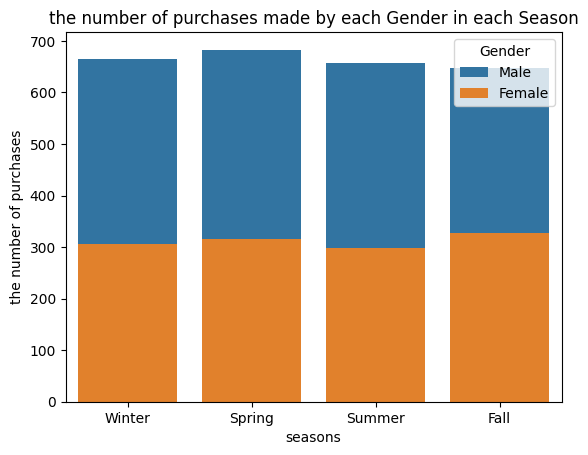

In [9]:
sns.countplot(x="Season",hue="Gender",data=df,dodge=False)
plt.title("the number of purchases made by each Gender in each Season")
plt.xlabel("seasons")
plt.ylabel("the number of purchases")
plt.show()

male purchasing during spring is the highst purchasing rate but all are in the same range

### Question 4
Create a heatmap showing the correlation between all numeric columns.
- Use `sns.heatmap`.
- Interpret the relationship between `Previous Purchases`, `Purchase Amount`, and `Review Rating`.

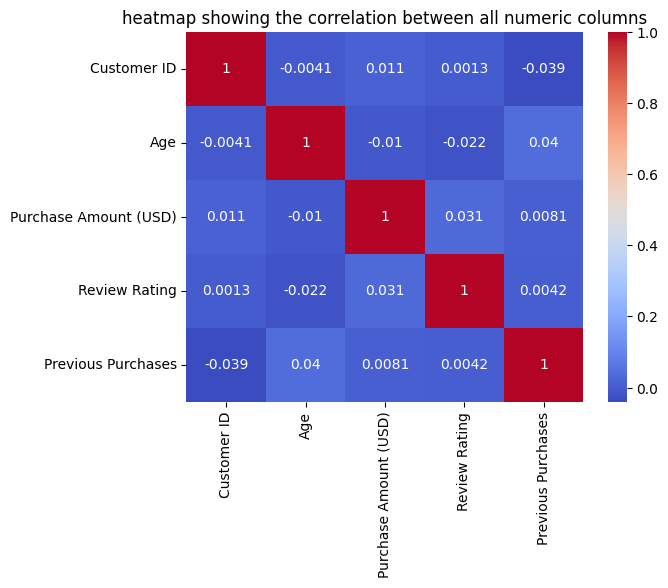

In [10]:
numeric_columns=df.select_dtypes(include=["int64","float64"])
corr=numeric_columns.corr()

sns.heatmap(corr,annot=True,cmap="coolwarm")
plt.title("heatmap showing the correlation between all numeric columns")
plt.show()

the correlation between Previous Purchases, Purchase Amount, and Review Rating is weak , maybe just the relation between Purchase Amount and Review Rating is the strongest between them

### Question 5
Create a scatter plot of `Age` vs `Purchase Amount (USD)`, color-coded by `Gender`.
- Use **Matplotlib and Seaborn side-by-side**.
- Add a trend line in Seaborn using `regplot`.

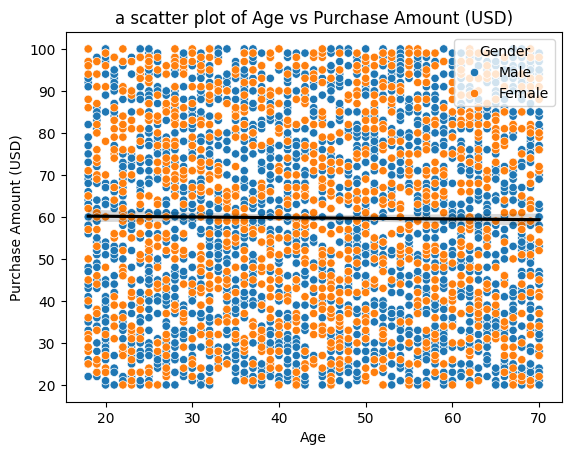

In [11]:
sns.scatterplot(x="Age",y="Purchase Amount (USD)",data=df,hue="Gender")
sns.regplot(x="Age",y="Purchase Amount (USD)",data=df,scatter=False,color="black")
plt.title("a scatter plot of Age vs Purchase Amount (USD)")
plt.xlabel("Age")
plt.ylabel("Purchase Amount (USD)")
plt.show()

there is no relation between the age and the Purchase Amount

### Question 6
How does the average review rating differ across different item `Categories` and `Sizes`?
- Use **Seaborn’s heatmap or pivot heatmap** to visualize.
- Use Pandas pivot table to prepare the data.

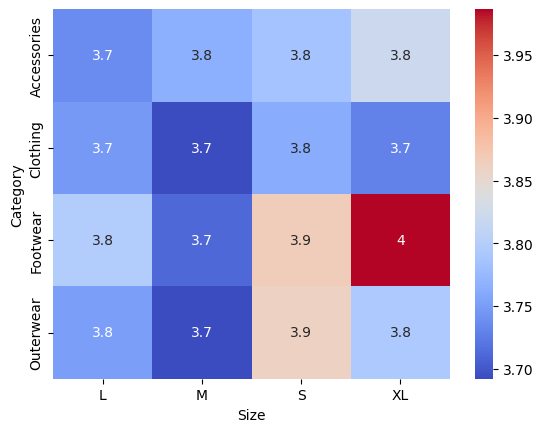

In [12]:
Pivot_table1 =df.pivot_table(
    values="Review Rating",
    index="Category",
    columns="Size",
    aggfunc="mean"
)
sns.heatmap(Pivot_table1,annot=True,cmap="coolwarm")
plt.show()

all the relations are strong but the relation between XL size and footware is the strongest

### Question 7
Which combinations of `Season` and `Shipping Type` lead to the highest average `Purchase Amount (USD)`?
- Show this as a **grouped bar chart** and as a **heatmap**.

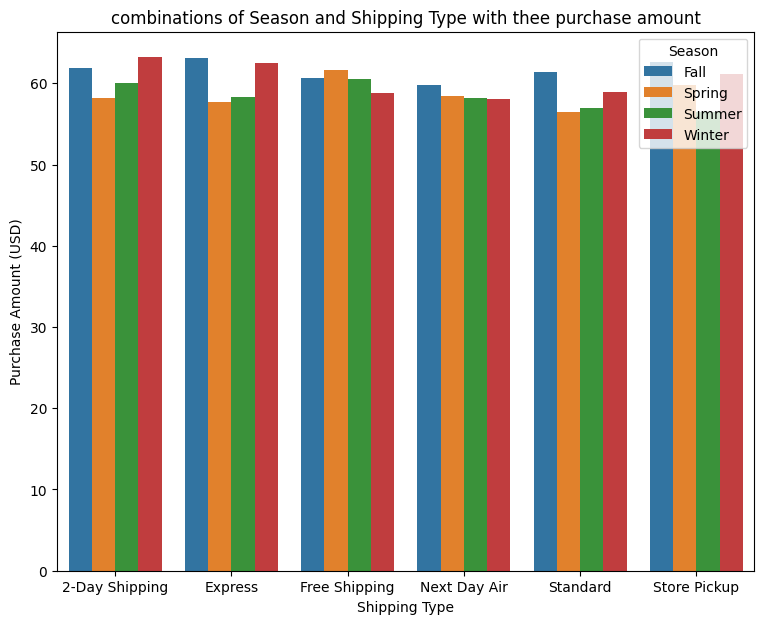

In [13]:
plt.figure(figsize=(9,7))
grouped_data=df.groupby(["Season","Shipping Type"])["Purchase Amount (USD)"].mean().reset_index()
sns.barplot(x="Shipping Type",y="Purchase Amount (USD)",hue="Season",data=grouped_data)
plt.title("combinations of Season and Shipping Type with thee purchase amount")
plt.xlabel("Shipping Type")
plt.ylabel("Purchase Amount (USD)")
plt.show()

all the combinations of Season and Shipping Type have similar purchase amount

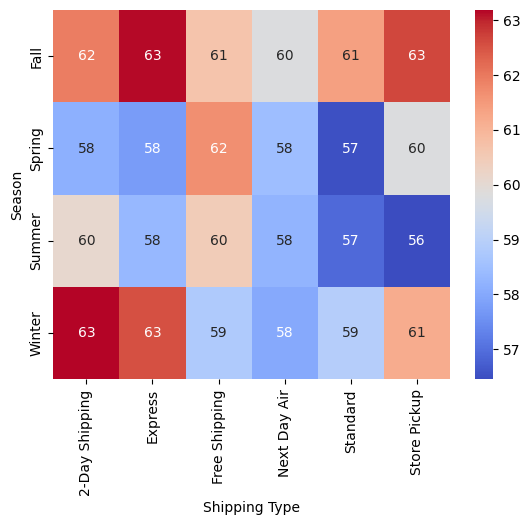

In [14]:
pivot_table2=df.pivot_table(
    values="Purchase Amount (USD)",
    index="Season",
    columns="Shipping Type",
    aggfunc="mean"
)
sns.heatmap(pivot_table2,annot=True,cmap="coolwarm")
plt.show()

the combinations of Season and Shipping Type that lead to the highest average Purchase Amount are (store pickup and fall) , (express and winter) , (express andfall) and (2-day shipping and winter)

### Question 8
Plot a violin plot of `Review Rating` by `Gender` for each `Subscription Status`.
- Use `sns.violinplot` with `hue`.

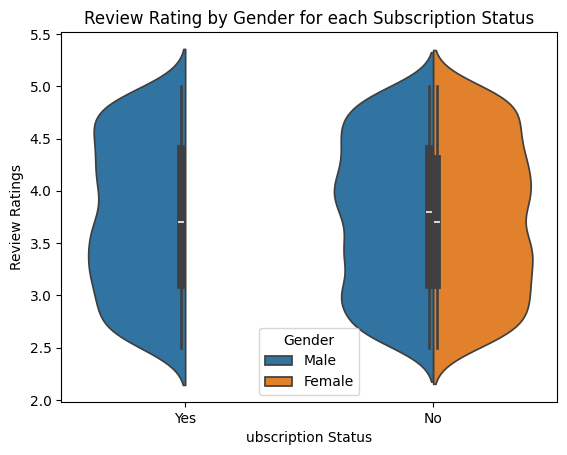

In [15]:
sns.violinplot(x="Subscription Status",y="Review Rating",hue="Gender",data=df,split=True)
plt.title("Review Rating by Gender for each Subscription Status")
plt.xlabel("ubscription Status")
plt.ylabel("Review Ratings")
plt.show()

there is no subscriped females at all and the subscriped males and not subscriped males and females have very close review ratings

### Question 9
What are the top 5 most purchased `Item Purchased` by total `Purchase Amount`?
- Use Pandas aggregation, plot with **Matplotlib pie and bar** charts.

In [16]:
top_item_purchased=df.groupby("Item Purchased")["Purchase Amount (USD)"].sum().sort_values(ascending=False).head()
top_item_purchased

,Purchase Amount (USD)
Item Purchased,
Blouse,10410
Shirt,10332
Dress,10320
Pants,10090
Jewelry,10010


the top 5 most purchased Item Purchased by total Purchase Amount are Blouses , shirts , dresses , pants and jewlery

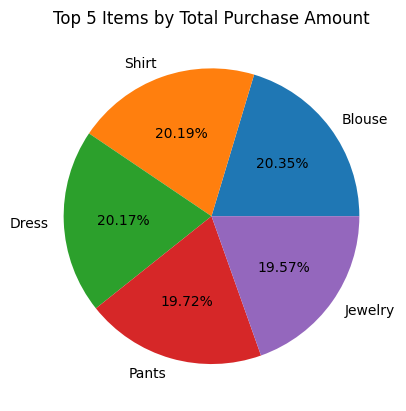

In [17]:
plt.pie(top_item_purchased,labels=top_item_purchased.index,autopct="%1.2f%%")
plt.title("Top 5 Items by Total Purchase Amount")
plt.show()

the most purchased item is the blouse

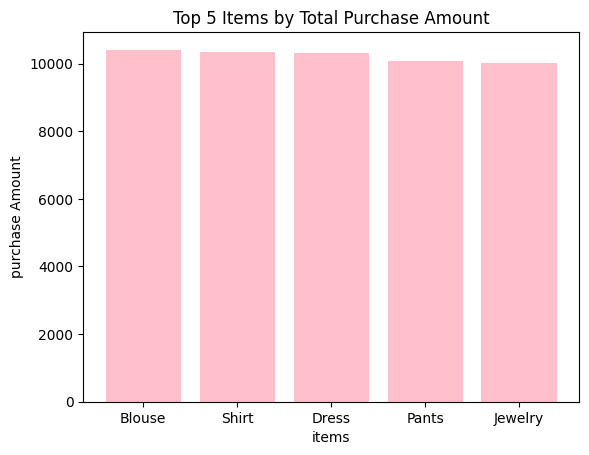

In [18]:
plt.bar(top_item_purchased.index,top_item_purchased.values,color="pink")
plt.title("Top 5 Items by Total Purchase Amount")
plt.xlabel("items")
plt.ylabel("purchase Amount")
plt.show()

### Question 10
Which `Location` has the highest average `Purchase Amount`, and how does it relate to `Previous Purchases` (plot only top 5 purchase amount location)?
- Use a **Seaborn scatterplot** with size/marker variation.

In [19]:
top_purchase_amount_location=df.groupby("Location")["Purchase Amount (USD)"].mean().sort_values(ascending=False).reset_index().head()
top_purchase_amount_location=top_purchase_amount_location.merge(
    df.groupby("Location")["Previous Purchases"].sum().reset_index(),on="Location"
)
top_purchase_amount_location

,Location,Purchase Amount (USD),Previous Purchases
0,Alaska,67.597222,2023
1,Pennsylvania,66.567568,2029
2,Arizona,66.553846,1844
3,West Virginia,63.876543,1908
4,Nevada,63.379310,2265


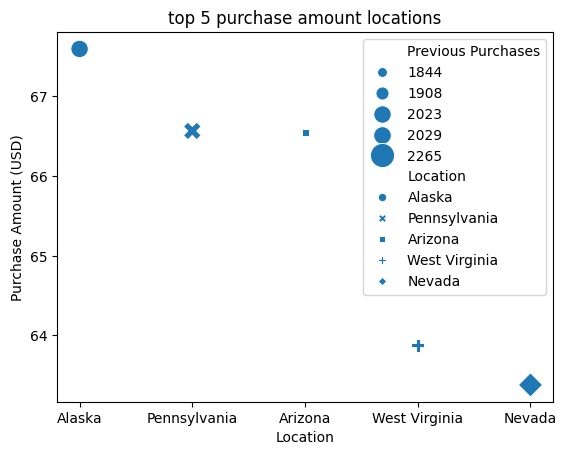

In [20]:
sns.scatterplot(x="Location",y="Purchase Amount (USD)",data=top_purchase_amount_location,size="Previous Purchases",sizes=(50,300),style="Location")
plt.title("top 5 purchase amount locations")
plt.xlabel("Location")
plt.ylabel("Purchase Amount (USD)")
plt.show()

the Location that has the highest average Purchase Amount is Alaska and the Location that has the lowest average Purchase Amount is Nevada while it has the largest previous purchase amount

### Question 11
Using a crosstab, find how `Gender` and `Size` interact.
- Plot using `sns.heatmap`.

In [21]:
import pandas as pd
cross_tab=pd.crosstab(df["Gender"],df["Size"])
cross_tab

Size,L,M,S,XL
Gender,,,,
Female,337,590,187,134
Male,716,1165,476,295


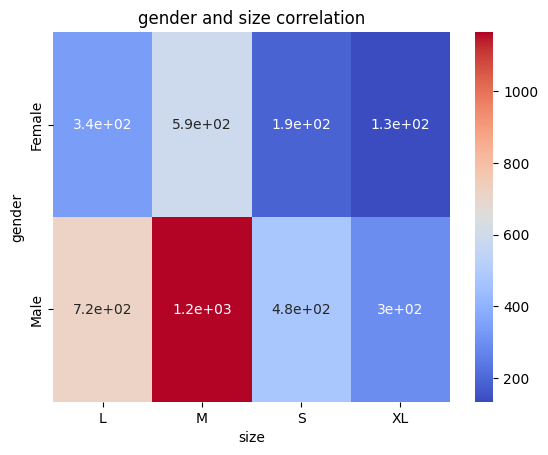

In [22]:
sns.heatmap(cross_tab,annot=True,cmap="coolwarm")
plt.title("gender and size correlation")
plt.xlabel("size")
plt.ylabel("gender")
plt.show()

the correlation between any size and any gender combination is very weak

### Question 12
How does the frequency of purchases column influence the use of promo codes?
- Create a **stacked bar chart** using Matplotlib and compare with a **Seaborn countplot**.

In [23]:
promocodes_purchases_relation=pd.crosstab(df["Frequency of Purchases"],df["Promo Code Used"])
promocodes_purchases_relation

Promo Code Used,No,Yes
Frequency of Purchases,,
Annually,334,238
Bi-Weekly,321,226
Every 3 Months,326,258
Fortnightly,299,243
Monthly,316,237
Quarterly,322,241
Weekly,305,234


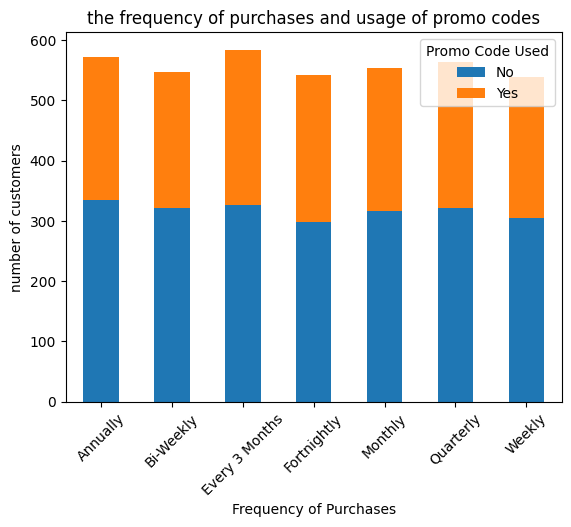

In [24]:
promocodes_purchases_relation.plot(kind="bar",stacked=True)
plt.title("the frequency of purchases and usage of promo codes")
plt.xlabel("Frequency of Purchases")
plt.ylabel("number of customers")
plt.xticks(rotation=45)
plt.show()

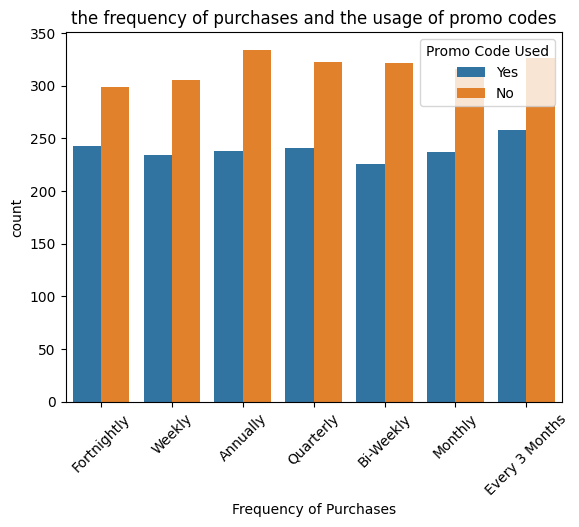

In [25]:
sns.countplot(x="Frequency of Purchases",hue="Promo Code Used",data=df)
plt.title("the frequency of purchases and the usage of promo codes")
plt.xlabel("Frequency of Purchases")
plt.ylabel("count")
plt.xticks(rotation=45)
plt.show()

people who doesn't use promo codes has higher purchase rates

### Question 13
Using a pairplot, show pairwise relationships between numeric columns segmented by `Gender`.
- Use `sns.pairplot` with `hue="Gender"`.

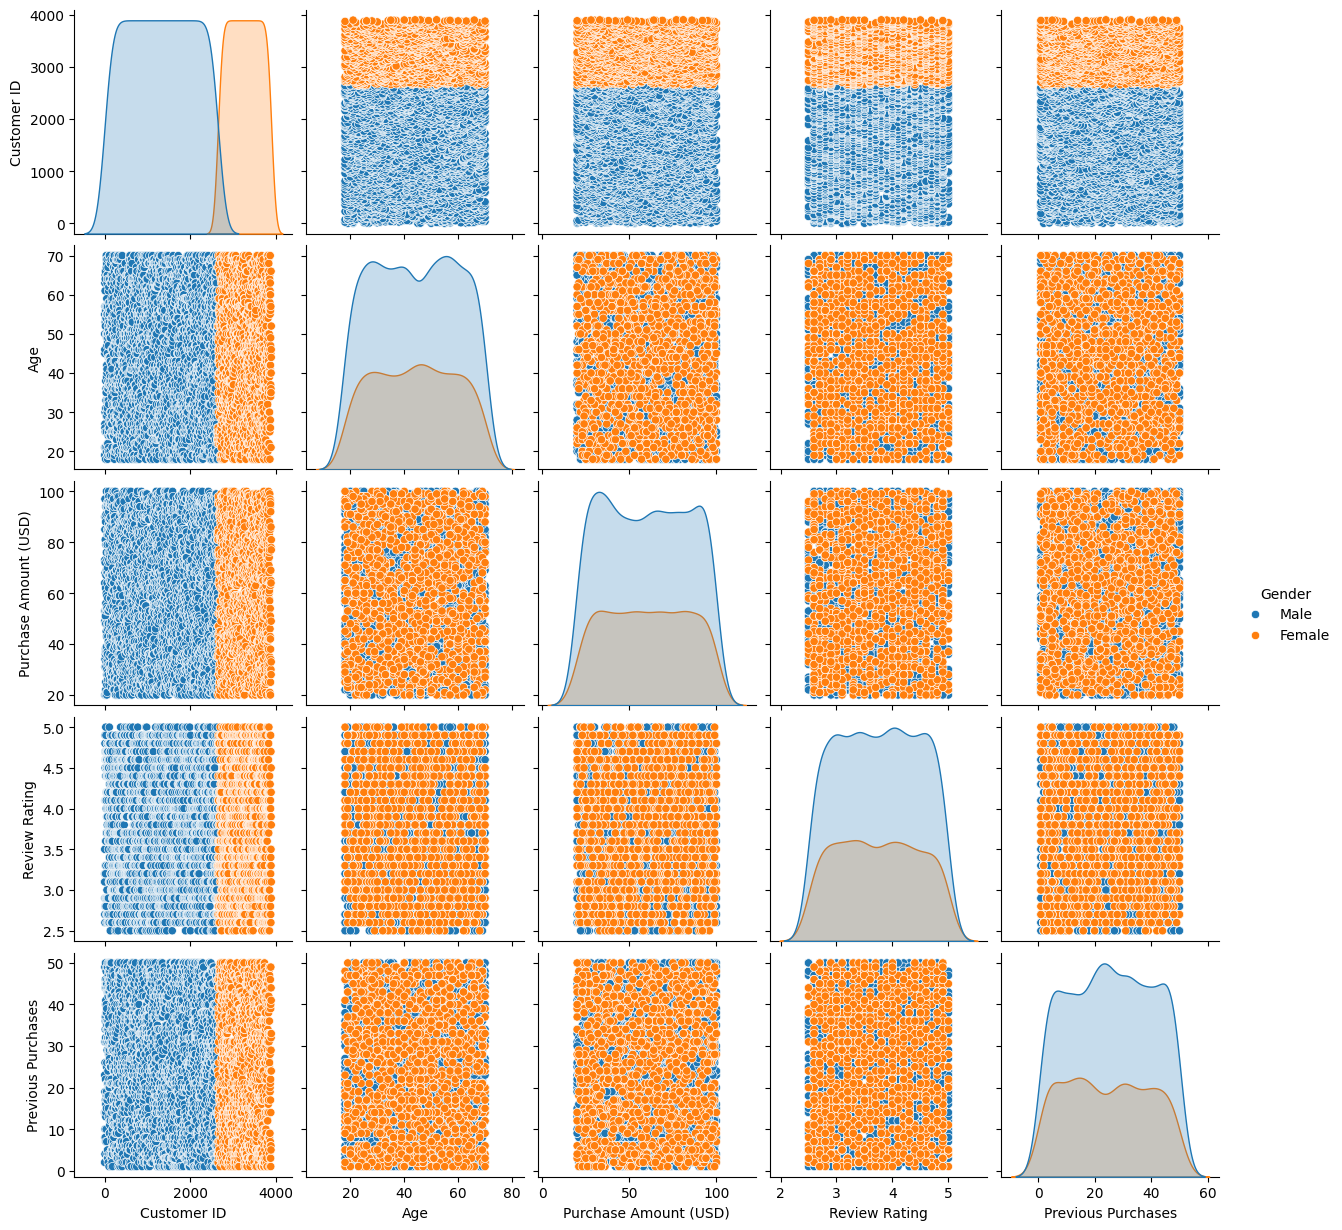

In [29]:
numeric_columns=df.select_dtypes(["int64","float64"])
data=pd.concat([numeric_columns,df["Gender"]],axis=1)
sns.pairplot(data,hue="Gender")